## OBJECTIVES

- Comparing the health impacts of different scenarios related to air pollution in different years and age groups to inform effective policymaking.
- Modeling how changes in air pollution levels might affect different diseases or health outcomes over time in a particular area or community

- This study estimates the long-term health impacts of exposure to air pollution in 
London from 2016 to 2050 for three scenarios: a baseline scenario where pollution 
remains at 2016 levels; a “ULEZ” scenario which models the health benefits of the 
central London Ultra Low Emission Zone, expansion to the North and South circular 
roads and tightening of the emissions standards for the Londonwide Low Emission 
Zone for heavy vehicles; and a scenario which models the health benefits of all the 
policies included in the London Environment Strategy.

1st Scenario:  The baseline scenario assumes air pollution levels remain at 2016 levels throughout the period to 2050.
2nd Scenario:  The Ultra Low Emission Zone (ULEZ) includes modelled air quality improvements resulting from the introduction of the central ULEZ in 2019, the tightening of the     restrictions of the Low Emission Zone (LEZ) in 2020, and the expansion of the ULEZ in 2021, as well as additional policy measures in the period 2016-2024.
3rd Scenario:  The London Environment Strategy (LES) scenario which includes modelled air quality improvements as a result of the central ULEZ, LEZ tightening and ULEZ expansion, as well as those resulting from additional policies in the LES over the period 2025-2050. 
4th Scenario: A final scenario was run which reduces exposure to non-anthropogenic levels for the whole population to compute the total number of new diseases attributable man made to air pollution.


In [2]:
import pandas as pd
import os
import pandas as pd
import seaborn as sns # new library
import matplotlib.pyplot as plt
import numpy as np

#Load Data 

df_no2 = pd.read_excel('../../data_clean/health_xls/city-of-london-no2-xlsm-50.xls', 'Incidence')
df_no2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Scenario   4340 non-null   int64 
 1   Year       4340 non-null   int64 
 2   Disease    4340 non-null   object
 3   AgeGroup   4340 non-null   object
 4   Incidence  4340 non-null   int64 
 5   95% CL     4340 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 203.6+ KB


In [3]:
df_pm25 = pd.read_excel('../../data_clean/health_xls/city-of-london-pm25-xlsm-39.xls', 'Incidence')
df_no2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Scenario   4340 non-null   int64 
 1   Year       4340 non-null   int64 
 2   Disease    4340 non-null   object
 3   AgeGroup   4340 non-null   object
 4   Incidence  4340 non-null   int64 
 5   95% CL     4340 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 203.6+ KB


## Basic Checks and exploratory analysis

In [4]:
print('NO2')
print(df_no2.describe(include='all'))

NO2
           Scenario         Year           Disease AgeGroup    Incidence  \
count   4340.000000  4340.000000              4340     4340  4340.000000   
unique          NaN          NaN                 7        5          NaN   
top             NaN          NaN  childhood asthma    total          NaN   
freq            NaN          NaN               700      980          NaN   
mean       1.500000  2033.000000               NaN      NaN   134.057143   
std        1.118163    10.100669               NaN      NaN   264.012878   
min        0.000000  2016.000000               NaN      NaN     0.000000   
25%        0.750000  2024.000000               NaN      NaN     0.000000   
50%        1.500000  2033.000000               NaN      NaN    32.000000   
75%        2.250000  2042.000000               NaN      NaN   174.000000   
max        3.000000  2050.000000               NaN      NaN  1743.000000   

             95% CL  
count   4340.000000  
unique          NaN  
top             N

In [5]:
print('PM25')
print(df_pm25.describe(include='all'))

PM25
           Scenario         Year           Disease AgeGroup    Incidence  \
count   5040.000000  5040.000000              5040     5040  5040.000000   
unique          NaN          NaN                 8        5          NaN   
top             NaN          NaN  childhood asthma    total          NaN   
freq            NaN          NaN               700     1120          NaN   
mean       1.500000  2033.000000               NaN      NaN   116.039881   
std        1.118145    10.100507               NaN      NaN   245.973761   
min        0.000000  2016.000000               NaN      NaN     0.000000   
25%        0.750000  2024.000000               NaN      NaN     0.000000   
50%        1.500000  2033.000000               NaN      NaN    46.000000   
75%        2.250000  2042.000000               NaN      NaN   123.000000   
max        3.000000  2050.000000               NaN      NaN  1740.000000   

             95% CL  
count   5040.000000  
unique          NaN  
top             

In [6]:
df_no2.head(20)

,Scenario,Year,Disease,AgeGroup,Incidence,95% CL
0,0,2016,childhood asthma,0-5,199,1
1,0,2016,childhood asthma,06-17,145,1
2,0,2016,childhood asthma,18-64,0,0
3,0,2016,childhood asthma,65+,0,0
4,0,2016,childhood asthma,total,344,1
5,0,2016,adult asthma,0-5,0,0
6,0,2016,adult asthma,06-17,0,0
7,0,2016,adult asthma,18-64,219,1
8,0,2016,adult asthma,65+,34,1
9,0,2016,adult asthma,total,253,1


In [7]:
df_pm25.head(20)

,Scenario,Year,Disease,AgeGroup,Incidence,95% CL
0,0,2016,childhood asthma,0-5,134,1
1,0,2016,childhood asthma,06-17,241,1
2,0,2016,childhood asthma,18-64,0,0
3,0,2016,childhood asthma,65+,0,0
4,0,2016,childhood asthma,total,375,1
5,0,2016,chronic obstructive pulmonary disease,0-5,0,0
6,0,2016,chronic obstructive pulmonary disease,06-17,0,0
7,0,2016,chronic obstructive pulmonary disease,18-64,89,1
8,0,2016,chronic obstructive pulmonary disease,65+,52,1
9,0,2016,chronic obstructive pulmonary disease,total,141,1


## Analysis of base Scenario - No action performed by Gov

In [8]:
baseline_no2 = df_no2[df_no2['Scenario'] == 2]
baseline_no2

,Scenario,Year,Disease,AgeGroup,Incidence,95% CL
2170,2,2016,childhood asthma,0-5,199,1
2171,2,2016,childhood asthma,06-17,145,1
2172,2,2016,childhood asthma,18-64,0,0
2173,2,2016,childhood asthma,65+,0,0
2174,2,2016,childhood asthma,total,344,1
...,...,...,...,...,...,...
3250,2,2050,lung cancer,06-17,0,0
3251,2,2050,lung cancer,18-64,17,0
3252,2,2050,lung cancer,65+,62,1
3253,2,2050,lung cancer,total,79,1


In [9]:
baseline_pm25 = df_pm25[df_pm25['Scenario'] == 2]
baseline_pm25

,Scenario,Year,Disease,AgeGroup,Incidence,95% CL
2520,2,2016,childhood asthma,0-5,135,1
2521,2,2016,childhood asthma,06-17,241,1
2522,2,2016,childhood asthma,18-64,0,0
2523,2,2016,childhood asthma,65+,0,0
2524,2,2016,childhood asthma,total,376,1
...,...,...,...,...,...,...
3775,2,2050,stroke,06-17,1,0
3776,2,2050,stroke,18-64,26,0
3777,2,2050,stroke,65+,108,1
3778,2,2050,stroke,total,135,1


In [10]:
# Missing values

print('NO2',df_no2.isnull().sum())
print('PM25',df_pm25.isnull().sum())

NO2 Scenario     0
Year         0
Disease      0
AgeGroup     0
Incidence    0
95% CL       0
dtype: int64
PM25 Scenario     0
Year         0
Disease      0
AgeGroup     0
Incidence    0
95% CL       0
dtype: int64


In [11]:
df_no2['Year'] = pd.to_datetime(df_no2['Year'], format='%Y')
df_pm25['Year'] = pd.to_datetime(df_pm25['Year'], format='%Y')

In [12]:
diseases_no2 = df_no2['Disease'].unique()
diseases_no2

array(['childhood asthma', 'adult asthma', 'dementia', 'diabetes',
       'low birth weight', 'lung cancer', 'total'], dtype=object)

In [13]:
diseases_pm25 = df_pm25['Disease'].unique()
diseases_pm25

array(['childhood asthma', 'chronic obstructive pulmonary disease',
       'diabetes', 'low birth weight', 'coronary heart disease',
       'lung cancer', 'stroke', 'total'], dtype=object)

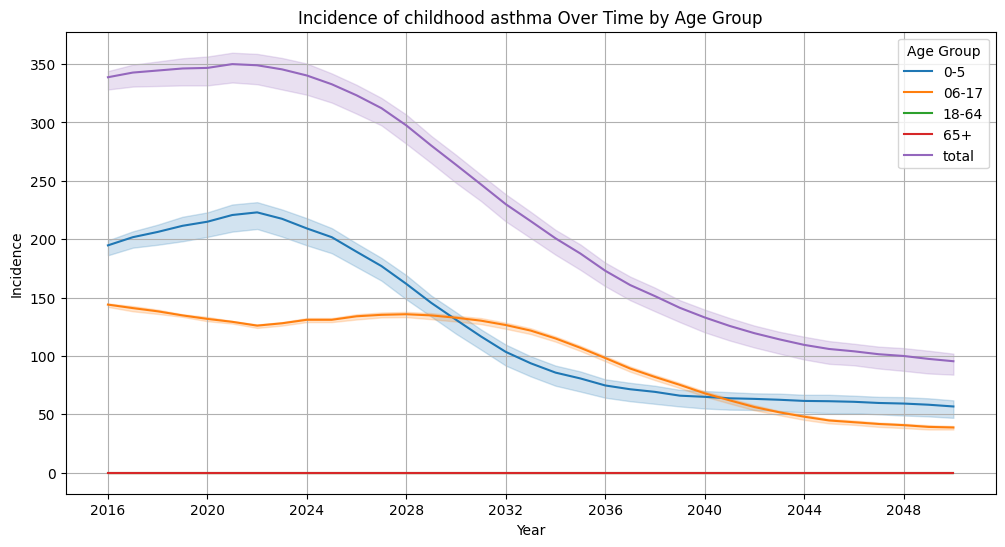

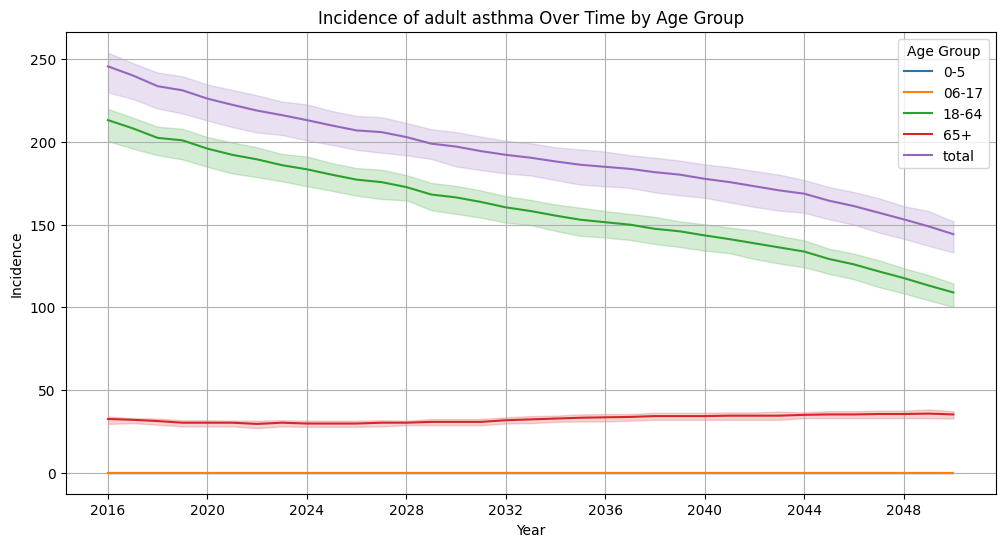

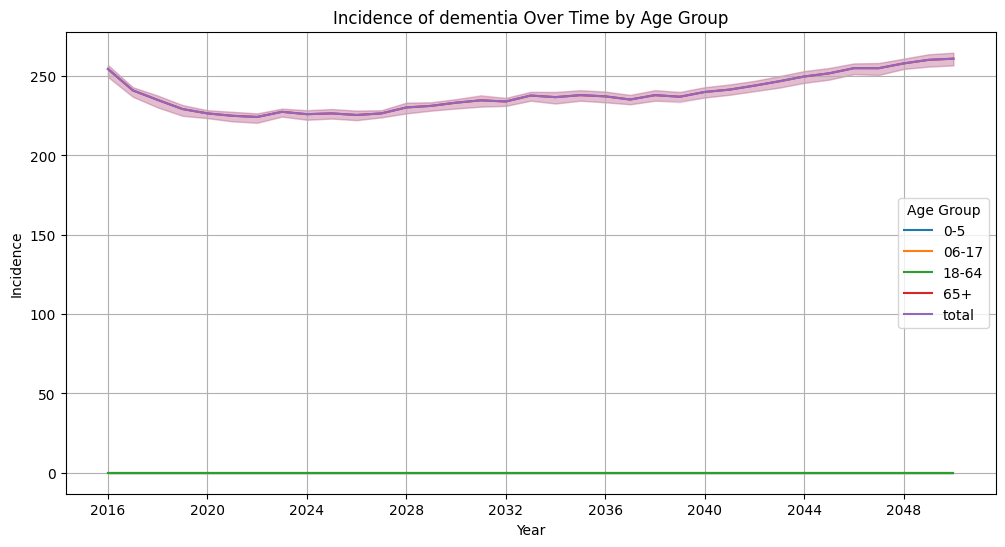

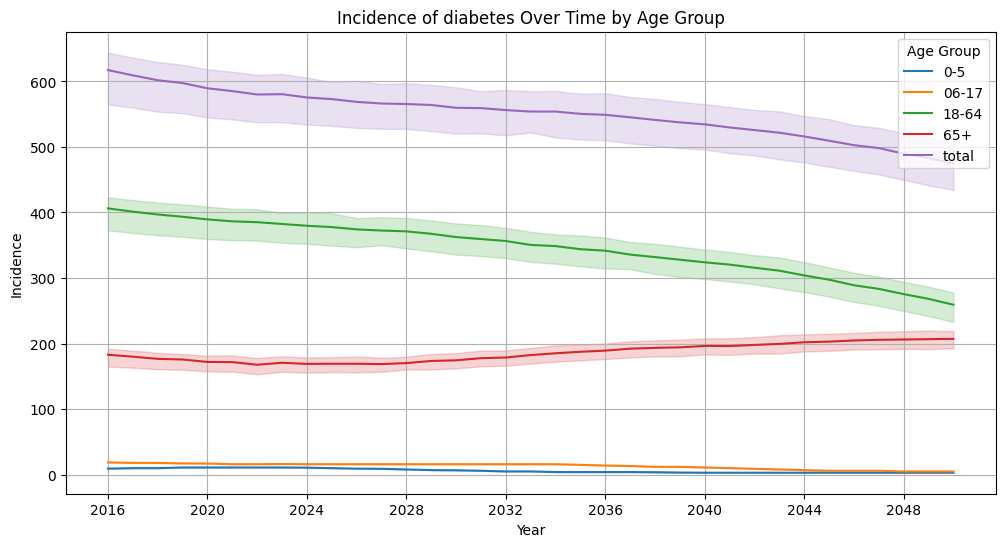

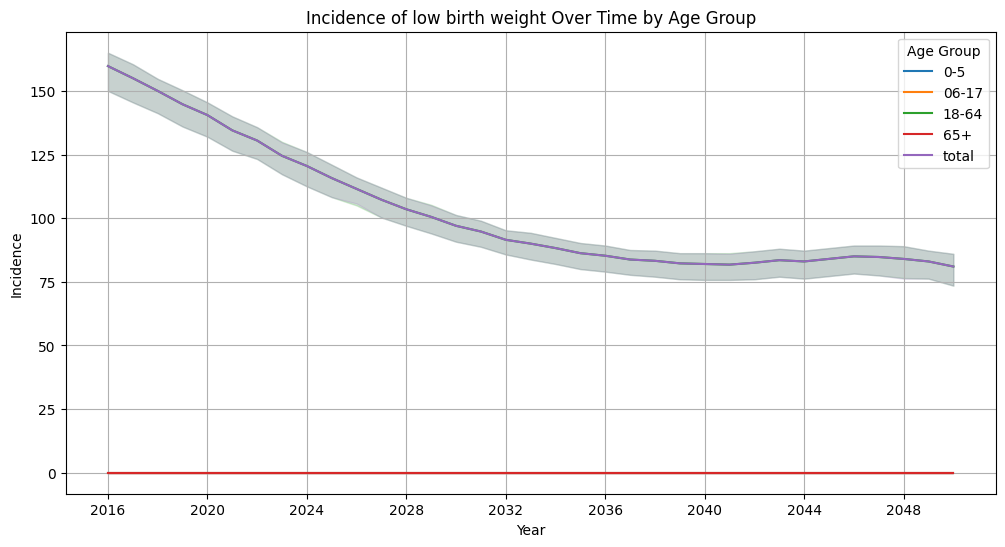

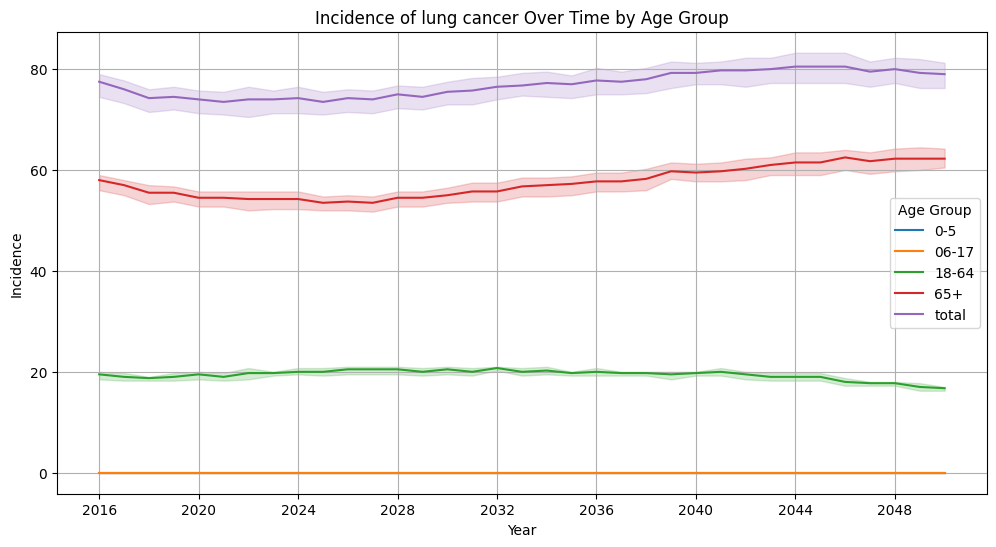

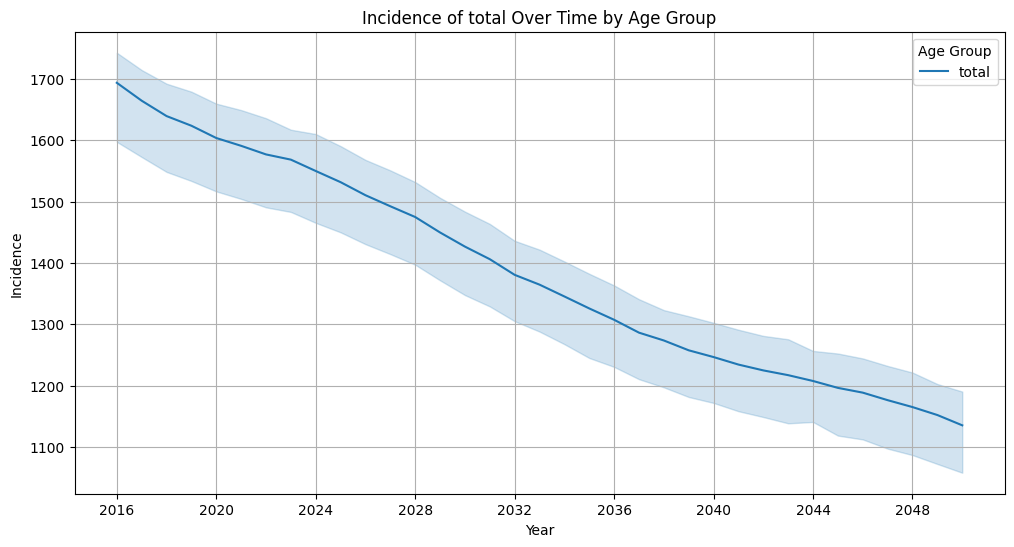

In [14]:
for disease in diseases_no2:
    disease_no2 = df_no2[df_no2['Disease'] == disease]
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=disease_no2, x='Year', y='Incidence', hue='AgeGroup')
    
    plt.title(f'Incidence of {disease} Over Time by Age Group')
    plt.xlabel('Year')
    plt.ylabel('Incidence')
    plt.legend(title='Age Group')
    plt.grid(True)
    plt.show()

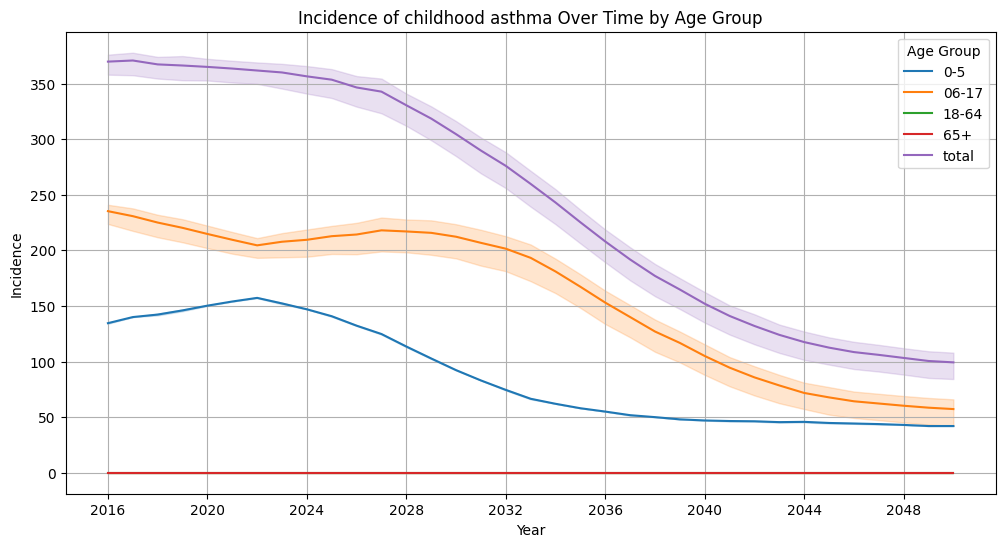

In [ ]:
for disease in diseases_pm25:
    disease_pm25 = df_pm25[df_pm25['Disease'] == disease]

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=disease_pm25, x='Year', y='Incidence', hue='AgeGroup')
    
    plt.title(f'Incidence of {disease} Over Time by Age Group')
    plt.xlabel('Year')
    plt.ylabel('Incidence')
    plt.legend(title='Age Group')
    plt.grid(True)
    plt.show()

In [ ]:
# df_no2.head(100)
# df_no2['Year']
# df_no2.info()
df_pm25.head(20)

In [ ]:
df_selected_years = df_pm25[df_pm25['Year'].isin(['2016', '2050'])]

# Group the data by Disease and Year, and sum the Incidence values
grouped_data = df_selected_years.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()

plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar')
plt.title('Total Number of Incidents by Disease in 2016 and 2050')
plt.xlabel('Disease')
plt.ylabel('Total Number of Incidents')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(labels=['2016', '2050'], title='Year')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [ ]:
grouped_data.head(100)

In [ ]:
# Total number of incidents for each disease in 2016 and 2050
incidents_2016 = grouped_data['2016-01-01']
incidents_2050 = grouped_data['2050-01-01']

# Percentage increase for each disease
percentage_increase = ((incidents_2050 - incidents_2016) / incidents_2016) * 100

print("Percentage increase of incidents by disease between 2016 and 2050:")
print(percentage_increase)


In [ ]:
percentage_decrease = percentage_increase.abs()

plt.figure(figsize=(10, 6))
percentage_decrease.plot(kind='bar', color='salmon')
plt.title('Percentage Decrease of Incidents by Disease (2016-2050)')
plt.xlabel('Disease')
plt.ylabel('Percentage Decrease')
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()
plt.show()

In [ ]:


import os
# Define the directory where the Excel files are located
directory = 'C:/Users/MagdalenaKrasicka/CFG/Mind_the_Gap_Project'

# Define the sheet name to be merged
sheet_name = 'Incidence'

# Create an empty list to store the DataFrames
data_frames = []

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.xls'):
        file_path = os.path.join(directory, filename)
        # Read the specific sheet into a DataFrame
        df = pd.read_excel(file_path, sheet_name=sheet_name)
        # Append the DataFrame to the list
        data_frames.append(df)

# Concatenate all the DataFrames in the list into a single DataFrame
merged_df = pd.concat(data_frames, ignore_index=True)

def combine_ci(series):
    return np.sqrt((series ** 2).sum())

grouped_df = merged_df.groupby(['Scenario', 'Year', 'Disease', 'AgeGroup'], as_index=False).agg({
    'Incidence': 'sum',
    '95% CL': combine_ci  # Combine 95% CL values
})

# Display the merged and grouped DataFrame
print(grouped_df.head())

# Optionally, save the grouped DataFrame to a new Excel file
output_file = os.path.join(directory, 'london_incidence_data_with_ci.xlsx')
grouped_df.to_excel(output_file, index=False)

print(f"Data successfully merged and saved to {output_file}")
